# Clustering Analysis
Here are several uses of clustering analysis
* singular sample TSNE:
    - immune & Cancer & stroma
    - immune: myeloid & lymphoid
* saving TSNE representation for all samples & saving images of the representation
* Cohort analysis:
 - TSNE representation of all immune cells. saving representation
 - KMEANS with k <- (1,2,3,...,15)
 - will search for gene markers for each cluster.


In [1]:
import sys
lib = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
import os
from os.path import join
import sklearn
from utilities.droplet_dataset import *
# from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
import time
import matplotlib.pyplot as plt
import copy
from scipy import stats
from sklearn.cluster import KMeans
from collections import Counter
from PIL import Image, ImageColor
from termcolor import colored
from sklearn.manifold import TSNE
from DL.Mars_seq_DL.data_loading import extract_droplet_data_from_pickle

In [4]:
SAMPLES = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\21.2.21'

#  singular sample TSNE:
    - immune & Cancer & stroma
    - immune: myeloid & lymphoid

In [10]:
sample_id = 'M110'

sample_path = os.path.join(SAMPLES, f'{sample_id}.pkl')
rna_sample = pickle.load(open(sample_path, 'rb'))
# Only because the samle had been saved in old version without one of the attributes.
_rna_sample = RNAseq_Sample(counts=rna_sample.counts, gene_names=rna_sample.gene_names, barcodes=rna_sample.barcodes, 
                        features=rna_sample.features, cells_information=rna_sample.cells_information)
rna_sample = _rna_sample 
print(f"Number of cells: {rna_sample.number_of_cells}")


rna_sample = rna_sample.filter_cells_by_property('should_be_removed', False)
rna_sample.normalize_data()
print(f"Number of cells after garbage has removed: {rna_sample.number_of_cells}")


Number of cells: 4307
Number of cells after garbage has removed: 3170


Running TSNE on sample
Drawing full representation now
3170


NameError: name 'sns' is not defined

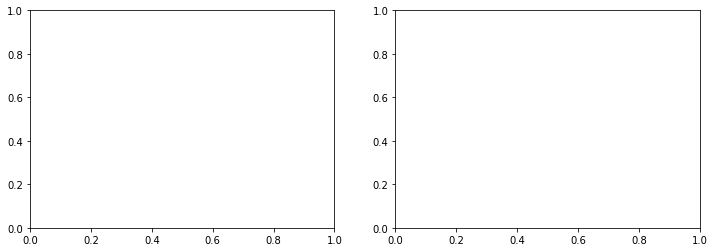

In [11]:
print("Running TSNE on sample")
cells_embedded = TSNE(n_components=2, random_state=21).fit_transform(rna_sample.counts)


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

print("Drawing full representation now")
is_cancer = rna_sample.cells_information.getattr('is_cancer')
is_stroma = rna_sample.cells_information.getattr('is_stromal')
is_immune = rna_sample.cells_information.getattr('is_immune')
colors = []
print(rna_sample.number_of_cells)
for i in range(rna_sample.number_of_cells):
    if is_cancer[i]:
        colors.append("tumor")
    elif is_immune[i]:
        colors.append("immune")
    else:
        colors.append("stroma")

df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df["cell type"] = colors
sns.scatterplot(ax=axes[0], x="X", y="Y",
              hue="cell type",
              data=df)



# coloring by is_myeloid and is_lymphoid
is_m = rna_sample.cells_information.getattr('is_myeloid')
is_l = rna_sample.cells_information.getattr('is_lymphoid')
colors = []
for i in range(rna_sample.number_of_cells):
    if rna_sample[i][1].is_lymphoid:
        colors.append(0)
    elif rna_sample[i][1].is_myeloid:
        colors.append(1)
    else:
        colors.append(2)

print("Drawing immune cells only")        
immune_cells = rna_sample.filter_cells_by_property('is_immune', True)
print(f'Number of immune cells: {immune_cells.number_of_cells}')
print(rna_sample.counts.shape)
rna_sample.filter_genes_by_variance(6)
print(f"shape after reming gene under variance: {immune_cells.counts.shape}")

df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df["cell type"] = colors
sns.scatterplot(ax=axes[1], x="X", y="Y",
              hue="cell type",
              data=df)
axes[0].set_title("All cells")
axes[1].set_title("Immune")
fig.suptitle('TSNE')